In [ ]:
Projet info v2

In [17]:
#Installation des items 

import geopandas as gpd
import numpy as np
import pandas as pd
import requests
import tempfile
import zipfile
import json
import matplotlib.pyplot as plt

#Représentation des points dans la carte à partir de folium  
#!pip install folium 
import folium

In [2]:
#Téléchargement de la carte 



url = 'https://www.data.gouv.fr/fr/datasets/r/07b7c9a2-d1e2-4da6-9f20-01a7b72d4b12'
temporary_location = tempfile.gettempdir()

def download_unzip(url, dirname = tempfile.gettempdir(), destname = "borders"):
    myfile = requests.get(url)
    open(dirname + '/' + destname + '.zip', 'wb').write(myfile.content)
    with zipfile.ZipFile(dirname + '/' + destname + '.zip', 'r') as zip_ref:
        zip_ref.extractall(dirname + '/' + destname)
        
download_unzip(url)
communes = gpd.read_file(temporary_location + "/borders/communes-20190101.json")
communes.head()

paris = communes[communes.insee.str.startswith("75")]
ax = paris.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
#ctx.add_basemap(ax, crs = paris.crs.to_string())
ax

In [24]:
#ajout des arrondissement
arrondissements = gpd.read_file("https://opendata.paris.fr/explore/dataset/arrondissements/download/?format=geojson&timezone=Europe/Berlin&lang=fr")
print(arrondissements)
arrondissements.dtypes

      n_sq_co     perimetre        l_ar       surface    n_sq_ar  \
0   750001537   8282.011886  11ème Ardt  3.665442e+06  750000011   
1   750001537  24089.666298  12ème Ardt  1.631478e+07  750000012   
2   750001537   5420.908434   4ème Ardt  1.600586e+06  750000004   
3   750001537  10317.483310  14ème Ardt  5.614877e+06  750000014   
4   750001537  17416.109657  16ème Ardt  1.637254e+07  750000016   
5   750001537   6483.686786   6ème Ardt  2.153096e+06  750000006   
6   750001537   6471.588290   9ème Ardt  2.178303e+06  750000009   
7   750001537   9916.464176  18ème Ardt  5.996051e+06  750000018   
8   750001537   6739.375055  10ème Ardt  2.891739e+06  750000010   
9   750001537  10775.579516  17ème Ardt  5.668835e+06  750000017   
10  750001537  10704.940486  20ème Ardt  5.983446e+06  750000020   
11  750001537   4519.263648   3ème Ardt  1.170883e+06  750000003   
12  750001537   8099.424883   7ème Ardt  4.090057e+06  750000007   
13  750001537  11546.546526  13ème Ardt  7.14931

n_sq_co         int64
perimetre     float64
l_ar           object
surface       float64
n_sq_ar         int64
l_aroff        object
c_arinsee       int64
c_ar            int64
geometry     geometry
dtype: object

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


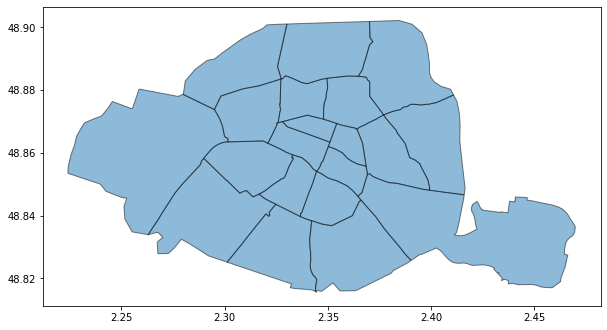

In [4]:
arrondissements = arrondissements.rename(columns = {"c_arinsee": "insee"})
arrondissements['insee'] = arrondissements['insee'].astype(str)
communes = communes[~communes.insee.str.startswith("75")].append(arrondissements)

paris = communes[communes.insee.str.startswith("75")]
ax = paris.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ax

In [126]:
#Ajout des stations de métro RER 

stations = open("/Users/Leopold/Documents/DOCUMENTS/ENSAE/2A/Projet info/emplacement-des-gares-idf.geojson", "r")
stations_2 = gpd.read_file(stations)
stations_2

,res_stif,cod_ligf,tramway,objectid,tertrain,cod_resf,tertram,id_ref_zdl,navette,terrer,...,metro,terval,indice_lig,mode,nomlong,idf,x,idrefliga,idrefligc,geometry
0,110.0,14.0,0,3,0,3.0,0,42369,0,0,...,1,0,7b,Metro,BOTZARIS,1,655197.2716,A01550,None,POINT (2.38912 48.87948)
1,110.0,4.0,0,27,0,3.0,0,45704,0,0,...,1,0,12,Metro,ASSEMBLEE NATIONALE,1,650183.7135,A01545,None,POINT (2.32100 48.86079)
2,110.0,15.0,0,31,0,3.0,0,45357,0,0,...,1,0,8,Metro,BALARD,1,647015.7484,A01541,None,POINT (2.27816 48.83593)
3,110.0,1.0,0,34,0,3.0,0,42288,0,0,...,1,0,1,Metro,BASTILLE,1,653721.5234,A01534,None,POINT (2.36932 48.85248)
4,110.0,12.0,0,37,0,3.0,0,45222,0,0,...,1,0,6,Metro,BEL-AIR,1,656030.6977,A01539,None,POINT (2.40092 48.84134)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144,855.0,30.0,0,1120,0,1.0,0,47767,0,0,...,0,0,U,Train,SEVRES-VILLE-D'AVRAY,1,641321.8823,A01855,None,POINT (2.20072 48.82724)
1145,0.0,0.0,1,1122,0,0.0,0,43078,0,0,...,0,0,11,Tramway,GARE D'EPINAY VILLETANEUSE,1,650883.8822,A02225,C01999,POINT (2.32928 48.95913)
1146,112.0,0.0,1,1134,0,5.0,0,45478,0,0,...,0,0,3B,Tramway,Epinettes - Pouchet,1,650418.9589,A01757,C01679,POINT (2.32373 48.89752)
1147,112.0,0.0,1,1135,0,5.0,0,45529,0,0,...,0,0,3B,Tramway,Angélique Compoint - Porte de Montmartre,1,651467.5501,A01757,C01679,POINT (2.33803 48.89783)


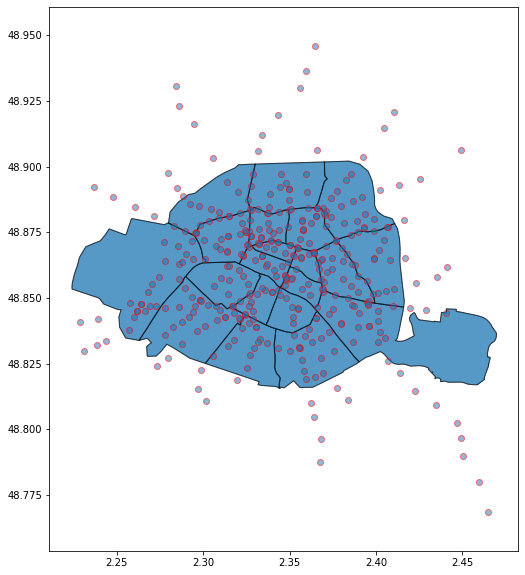

In [6]:
#Représentation initiale du projet 

ax = stations_2[stations_2["mode"].str.startswith("Metro")].plot(figsize=(10, 10), alpha=0.5, edgecolor='r', zorder = 2)
paris.plot(ax = ax, figsize=(10, 10), alpha=0.5, edgecolor='k') 
arrondissements.plot(ax = ax,figsize=(10, 10), alpha=0.5, edgecolor='k')

In [7]:
#Ajout base de donnée des trotinnettes 

df = pd.read_csv("/Users/Leopold/Documents/DOCUMENTS/ENSAE/2A/Projet info/TierBase9HLu.csv")
df

,Unnamed: 0,ID,BatteryLevel,Lat,Lng,Type,Status,Heure,Jour
0,0,e90536f1-7b8d-4284-bf45-c337b418875c,70,48.840514,2.305057,escooter,ACTIVE,9h,Lundi
1,1,f6858f70-1f06-4665-8823-9290851a3daf,88,48.852286,2.365897,escooter,ACTIVE,9h,Lundi
2,2,96633de0-823c-4836-addb-e15fa41e26c6,72,48.822769,2.340591,escooter,ACTIVE,9h,Lundi
3,3,12f17a08-2dc7-45b0-8b49-95d26b743056,91,48.848935,2.365273,escooter,ACTIVE,9h,Lundi
4,4,458760c1-8f94-4732-a42e-5fcdf3ac0b66,37,48.866426,2.326417,escooter,ACTIVE,9h,Lundi
...,...,...,...,...,...,...,...,...,...
3878,3878,2ccfa3de-67d2-46d6-855b-56ba7554198d,84,48.881503,2.301795,escooter,ACTIVE,9h,Lundi
3879,3879,e94d3637-762f-4fdf-abcc-03ed2bafa0b2,48,48.838303,2.300125,escooter,ACTIVE,9h,Lundi
3880,3880,b00bb07e-4d89-48ed-b1ed-f2b0f487256f,72,48.836180,2.292346,escooter,ACTIVE,9h,Lundi
3881,3881,ccd18920-15a6-43c6-afd9-03d6553877d4,39,48.833271,2.341411,escooter,ACTIVE,9h,Lundi


In [169]:
#Affichage de la carte sous module folium

coords = (46.539758, 2.430331)
map = folium.Map(location=coords, tiles='OpenStreetMap', zoom_start=6)
map

for i in range(len(df)):
    folium.CircleMarker(
        location = (df['Lat'][i], df['Lng'][i]),
        color = 'crimson',
        fill = True,
        fill_color = 'crimson'
    ).add_to(map)

sf = lambda x :{'fillColor':'#E88300', 'fillOpacity':0.5, 'color':'#E84000', 'weight':1, 'opacity':1}
folium.GeoJson(
    data=arrondissements,
    name="idf",
    style_function= sf
).add_to(map)
map



In [127]:
# Représentation des trotinettes avec geopandas
import descartes
from shapely.geometry import Point, polygon
df['geometry'] = [Point(xy) for xy in zip(df['Lat'], df['Lng'])]
#crs= {'init' : 'epsg : 4326'}

df['geometry'] = gpd.GeoDataFrame(df['geometry'], geometry = gpd.points_from_xy(df['Lat'], df['Lng']))
                                      
df.dtypes

Unnamed: 0        int64
ID               object
BatteryLevel      int64
Lat             float64
Lng             float64
Type             object
Status           object
Heure            object
Jour             object
geometry         object
geometry_gpd     object
geo              object
dtype: object

In [155]:
df1 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Lng'], df['Lat']))
df1

,Unnamed: 0,ID,BatteryLevel,Lat,Lng,Type,Status,Heure,Jour,geometry,geometry_gpd,geo
0,0,e90536f1-7b8d-4284-bf45-c337b418875c,70,48.840514,2.305057,escooter,ACTIVE,9h,Lundi,POINT (2.30506 48.84051),POINT (48.840514 2.305057),POINT (48.840514 2.305057)
1,1,f6858f70-1f06-4665-8823-9290851a3daf,88,48.852286,2.365897,escooter,ACTIVE,9h,Lundi,POINT (2.36590 48.85229),POINT (48.852286 2.365897),POINT (48.852286 2.365897)
2,2,96633de0-823c-4836-addb-e15fa41e26c6,72,48.822769,2.340591,escooter,ACTIVE,9h,Lundi,POINT (2.34059 48.82277),POINT (48.822769 2.340591),POINT (48.822769 2.340591)
3,3,12f17a08-2dc7-45b0-8b49-95d26b743056,91,48.848935,2.365273,escooter,ACTIVE,9h,Lundi,POINT (2.36527 48.84893),POINT (48.848935 2.365273),POINT (48.848935 2.365273)
4,4,458760c1-8f94-4732-a42e-5fcdf3ac0b66,37,48.866426,2.326417,escooter,ACTIVE,9h,Lundi,POINT (2.32642 48.86643),POINT (48.866426 2.326417),POINT (48.866426 2.326417)
...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3878,2ccfa3de-67d2-46d6-855b-56ba7554198d,84,48.881503,2.301795,escooter,ACTIVE,9h,Lundi,POINT (2.30180 48.88150),POINT (48.881503 2.301795),POINT (48.881503 2.301795)
3879,3879,e94d3637-762f-4fdf-abcc-03ed2bafa0b2,48,48.838303,2.300125,escooter,ACTIVE,9h,Lundi,POINT (2.30012 48.83830),POINT (48.838303 2.300125),POINT (48.838303 2.300125)
3880,3880,b00bb07e-4d89-48ed-b1ed-f2b0f487256f,72,48.836180,2.292346,escooter,ACTIVE,9h,Lundi,POINT (2.29235 48.83618),POINT (48.83618 2.292346),POINT (48.83618 2.292346)
3881,3881,ccd18920-15a6-43c6-afd9-03d6553877d4,39,48.833271,2.341411,escooter,ACTIVE,9h,Lundi,POINT (2.34141 48.83327),POINT (48.833271 2.341411),POINT (48.833271 2.341411)


In [114]:
df1['geometry'][5].distance(df1['geometry'][3])

0.049351773433180916

In [167]:
min_distancei = float(1000)
min_distance = []
station_min = []
for i in range(len(df1)):
    min_distancei = float(1000)
    station_min0 = "Essai"
    for j in range(len(stations_2)):
        
        if i != j :
            if df1['geometry'][i].distance(stations_2['geometry'][j]) <= min_distancei :
                min_distancei = df1['geometry'][i].distance(stations_2['geometry'][j])
                station_min0 = stations_2['nomlong'][j]
           
            else : 
                min_distancei = min_distancei
                station_min0 = station_min0
               
    min_distance.append(min_distancei)
    station_min.append(station_min0)
        
min_distance, station_min

([0.0030569471687799717,
  0.0030639658808569127,
  0.0023281883223270983,
  0.002492991651732812,
  0.0032104367956203184,
  0.0017183962561956518,
  0.0016679870081996574,
  0.0037255319605664053,
  0.003246282362115308,
  0.00146247850984563,
  0.0013943853772219535,
  0.0031516575696863896,
  0.003002036122790498,
  0.0036338431580136537,
  0.0028601332411206377,
  0.0021856476665362335,
  0.004407043374912556,
  0.0012341585508444984,
  0.0035461811417405896,
  0.002702836317483255,
  0.00043025380697122694,
  0.0008178036857491796,
  0.0021181663700305144,
  0.0009706038114509172,
  0.0030142283068630214,
  0.0011363863317668539,
  0.0017173931609565617,
  0.0012083003442661907,
  0.0037088361596284676,
  0.003997372635382241,
  0.0029619294619032442,
  0.0022420167097460092,
  0.0015332016636040906,
  0.0036788956600155875,
  0.0011131211198104226,
  0.0019984288660280384,
  0.003546046602592149,
  0.002532293833686418,
  0.0013959723796349568,
  0.000989504027449183,
  0.004052

In [170]:
#Ajout des résultats 

df1["station_min"] = station_min
df1["min_distance"] = min_distance


In [153]:
t.df['geometry'][2:5]

NameError: name 't' is not defined